Last updated: 15 Feb 2023

# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [1]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.4.0'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates). 

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function. 

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models. 

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model** 
<br/>

In [2]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [3]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [4]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [5]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [6]:
# init setup on exp
exp.setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [7]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,9192.5418,148516792.8000,12132.4733,-0.0175,1.0154,1.5637,0.0180
omp,Orthogonal Matching Pursuit,9191.5663,148619037.9698,12135.9667,-0.0180,1.0161,1.5666,0.0180
br,Bayesian Ridge,9195.0295,148681348.6316,12138.8558,-0.0186,1.0160,1.5658,0.0180
en,Elastic Net,9196.7784,148894953.5356,12147.0012,-0.0199,1.0168,1.5681,0.0200
ridge,Ridge Regression,9235.6876,149670276.9441,12178.3613,-0.0253,1.0190,1.5739,0.0190
lr,Linear Regression,9236.1261,149679639.2332,12178.7361,-0.0254,1.0191,1.5739,0.6940
lasso,Lasso Regression,9235.7161,149673862.0891,12178.5032,-0.0254,1.0190,1.5739,0.5100
llar,Lasso Least Angle Regression,9235.7159,149673869.0019,12178.5035,-0.0254,1.0190,1.5739,0.0210
lar,Least Angle Regression,9238.2397,149729647.3084,12180.8215,-0.0258,1.0192,1.5742,0.0190
huber,Huber Regressor,8474.0147,160777637.9021,12587.5340,-0.0882,0.9423,1.1147,0.0230


In [8]:
# compare models using OOP
# exp.compare_models()

In [9]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10580.4866,200400795.3571,14156.2988,-0.1970,1.0771,1.6220
1,9597.2934,166289041.6634,12895.3108,0.0331,0.9638,1.2589
2,8359.1849,108388921.8761,10411.0000,-0.3723,1.0761,1.7702
3,9185.3919,145699845.2861,12070.6191,-0.2166,1.1058,1.8201
4,8885.4717,159037060.0187,12610.9897,-0.1828,0.9790,1.1912
5,9026.4221,172610960.0273,13138.1490,-0.1104,0.9655,1.1727
6,10506.8232,194762125.9643,13955.7202,-0.3252,1.2671,1.7585
7,11022.5806,199678725.1024,14130.7723,-0.0980,1.0796,1.6111
8,10570.1831,189707801.8270,13773.4455,-0.2253,1.1318,1.7836


Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only. 

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

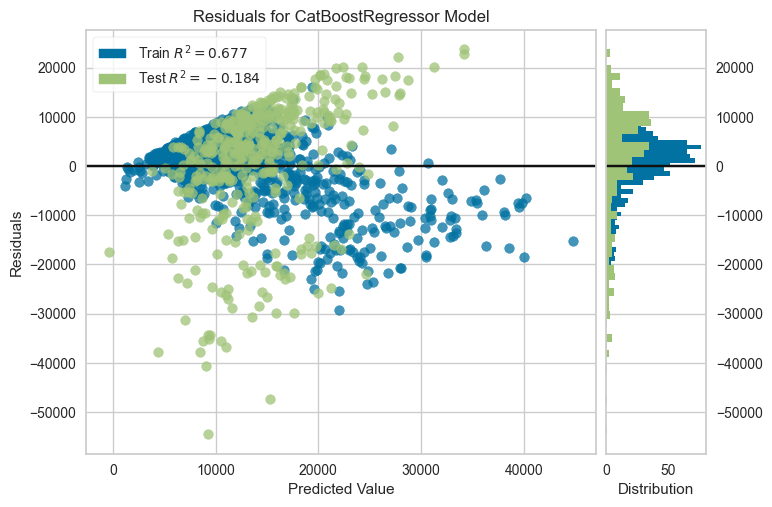

In [10]:
# plot residuals
plot_model(best, plot = 'residuals')

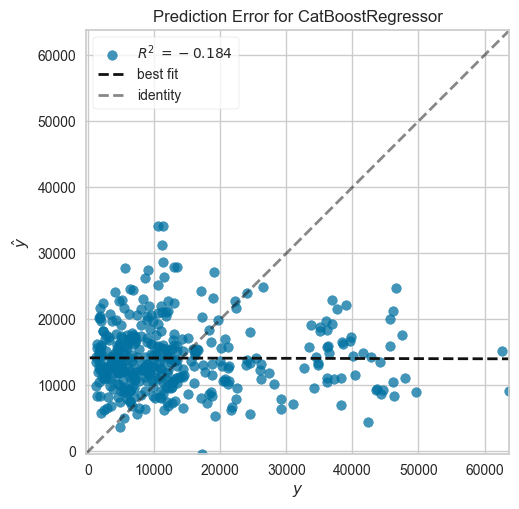

In [11]:
# plot error
plot_model(best, plot = 'error')

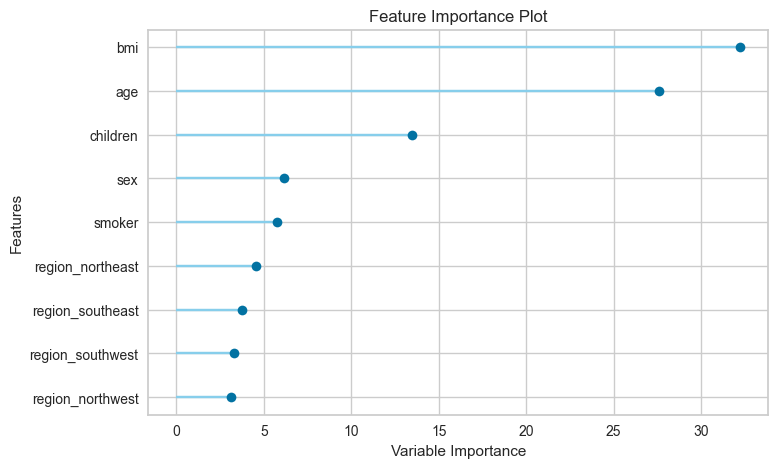

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')

In [13]:
# check docstring to see available plots 
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [14]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [15]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,9955.3140,169148685.3965,13005.7174,-0.1840,1.0440,1.5586


In [16]:
# show predictions df
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,13504.425282
319,32,male,37.334999,1,no,northeast,4667.607422,16114.309577
314,27,female,31.400000,0,yes,southwest,34838.871094,13424.087493
150,35,male,24.129999,1,no,northwest,5125.215820,22955.805214
336,60,male,25.740000,0,no,southeast,12142.578125,6919.557906


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [17]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('charges', axis=1, inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [18]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,5499.082074
1,18,male,33.770000,1,no,southeast,20929.778672
2,28,male,33.000000,3,no,southeast,10090.377502
3,33,male,22.705000,0,no,northwest,19514.314701
4,32,male,28.879999,0,no,northwest,22811.056640


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [19]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [20]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\celes\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x000001939B57CF90>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [21]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [22]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [23]:
# lets access X_train_transformed
get_config('X_train_transformed')

,age,sex,bmi,children,smoker,region_southwest,region_southeast,region_northwest,region_northeast
0,19.0,0.0,27.900000,0.0,1.0,1.0,0.0,0.0,0.0
1,18.0,1.0,33.770000,1.0,0.0,0.0,1.0,0.0,0.0
2,28.0,1.0,33.000000,3.0,0.0,0.0,1.0,0.0,0.0
3,33.0,1.0,22.705000,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,1.0,28.879999,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1329,52.0,1.0,38.599998,2.0,0.0,1.0,0.0,0.0,0.0
1330,57.0,0.0,25.740000,2.0,0.0,0.0,1.0,0.0,0.0
1331,23.0,0.0,33.400002,0.0,0.0,1.0,0.0,0.0,0.0
1334,18.0,0.0,31.920000,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [25]:
# help(setup)

In [26]:
# init setup with normalize = True
s = setup(data, target = 'charges', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


<Axes: >

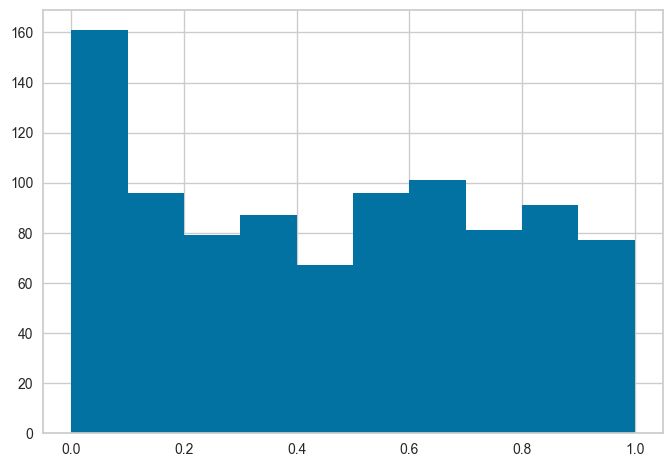

In [27]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['age'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

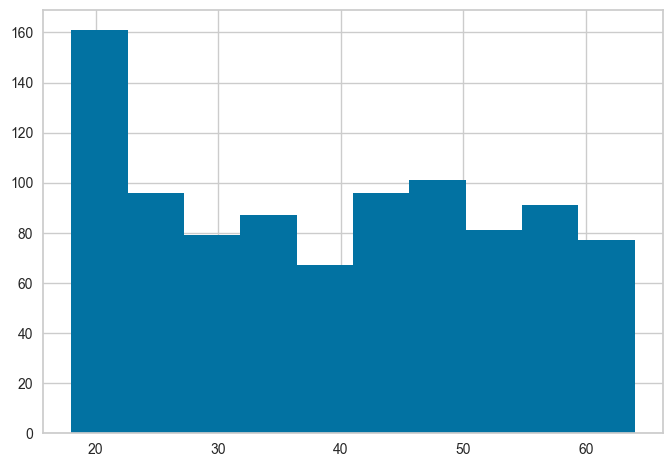

In [28]:
get_config('X_train')['age'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [29]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,9196.7962,148504418.0597,12131.8559,-0.0174,1.0157,1.5650,0.0220
dummy,Dummy Regressor,9192.5418,148516792.8000,12132.4733,-0.0175,1.0154,1.5637,0.0210
en,Elastic Net,9199.7686,148549726.9505,12133.8720,-0.0177,1.0159,1.5660,0.0200
omp,Orthogonal Matching Pursuit,9221.5250,149344322.9089,12165.8760,-0.0231,1.0180,1.5711,0.0240
ridge,Ridge Regression,9235.7964,149651033.9201,12177.5983,-0.0252,1.0190,1.5739,0.0190
lasso,Lasso Regression,9235.6445,149665146.0420,12178.1566,-0.0253,1.0190,1.5738,0.0230
llar,Lasso Least Angle Regression,9235.6430,149665174.6889,12178.1577,-0.0253,1.0190,1.5738,0.0220
lar,Least Angle Regression,9236.1261,149679639.2332,12178.7361,-0.0254,1.0191,1.5739,0.0190
lr,Linear Regression,9257.7067,150002684.8636,12194.0574,-0.0287,1.0209,1.5807,0.0180
huber,Huber Regressor,8473.8513,160759513.6419,12586.8693,-0.0881,0.9423,1.1148,0.0250


`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [30]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [31]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

ValueError: Estimator xgboost Not Available. Please see docstring for list of available estimators.

In [ ]:
compare_tree_models

GradientBoostingRegressor(random_state=123)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,2.354862e+07,4832.9291,0.8320,0.4447,0.3137,0.064
rf,Random Forest Regressor,2772.9195,2.540979e+07,5028.1973,0.8173,0.4687,0.3298,0.075
catboost,CatBoost Regressor,2899.4825,2.576275e+07,5057.5778,0.8163,0.4815,0.3522,0.046
lightgbm,Light Gradient Boosting Machine,3001.8884,2.554732e+07,5044.5767,0.8147,0.5445,0.3784,0.048
et,Extra Trees Regressor,2833.3624,2.842784e+07,5305.6516,0.7991,0.4877,0.3363,0.076
xgboost,Extreme Gradient Boosting,3439.8892,3.282651e+07,5711.7335,0.7626,0.6221,0.4465,0.042
dt,Decision Tree Regressor,3399.1402,4.810020e+07,6915.2984,0.6476,0.5629,0.4052,0.041


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [ ]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.0640
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.0800
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.0800
catboost,CatBoost Regressor,2899.4825,25762752.2096,5057.5778,0.8163,0.4815,0.3522,0.0420
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,0.0500
dt,Decision Tree Regressor,3399.1402,48100203.3847,6915.2984,0.6476,0.5629,0.4052,0.0430
xgboost,Extreme Gradient Boosting,3439.8892,32826514.4000,5711.7335,0.7626,0.6221,0.4465,0.0530
huber,Huber Regressor,3461.7327,49057640.5613,6981.8576,0.6528,0.4815,0.2188,0.0490
par,Passive Aggressive Regressor,3536.1733,48501878.1363,6940.1967,0.6566,0.4785,0.2154,0.0480
knn,K Neighbors Regressor,3778.4582,38143971.2000,6165.0463,0.7277,0.5027,0.3690,0.0470


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
# from pycaret.regression import *
# s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment')

In [ ]:
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [ ]:
# help(setup)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4221.7662,33767244.1606,5810.9590,0.7983,0.4864,0.4323
1,4529.8902,43625181.5268,6604.9361,0.7463,0.5543,0.4301
2,3958.4660,32631291.9087,5712.3806,0.5868,1.0240,0.4630
3,3725.8887,26679679.2570,5165.2376,0.7772,0.4979,0.5219
4,4437.1204,43552381.4341,6599.4228,0.6761,0.5731,0.3768
5,4115.6340,35844995.0079,5987.0690,0.7694,0.5381,0.4131
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4850.1058,46175035.2997,6795.2215,0.7461,0.5706,0.3959
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4221.7662,3.376724e+07,5810.9590,0.7983,0.4864,0.4323
1,4529.8902,4.362518e+07,6604.9361,0.7463,0.5543,0.4301
2,3958.4660,3.263129e+07,5712.3806,0.5868,1.0240,0.4630
3,3725.8887,2.667968e+07,5165.2376,0.7772,0.4979,0.5219
4,4437.1204,4.355238e+07,6599.4228,0.6761,0.5731,0.3768
5,4115.6340,3.584500e+07,5987.0690,0.7694,0.5381,0.4131
6,4098.0868,3.963132e+07,6295.3411,0.7303,0.5745,0.4266
7,4850.1058,4.617504e+07,6795.2215,0.7461,0.5706,0.3959
8,4621.0616,4.068192e+07,6378.2377,0.7372,0.7032,0.5225


In [ ]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4170.7537,35338831.9346,5944.6473,0.7482,0.6562,0.4578
1,4285.8970,39763353.6903,6305.8190,0.7176,0.5406,0.4443
2,4511.4189,40766553.9170,6384.8691,0.7492,0.6160,0.4383
Mean,4322.6899,38622913.1806,6211.7785,0.7383,0.6043,0.4468
Std,141.4885,2358035.1845,191.6273,0.0147,0.0479,0.0082


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3244.6173,45002914.9978,6708.4212,0.7312,0.5884,0.4883
1,3106.2611,45435728.7536,6740.6030,0.7358,0.5389,0.3271
2,3646.2662,54445682.2627,7378.7318,0.3107,0.6475,0.4752
3,3267.9250,45463401.7749,6742.6554,0.6204,0.5751,0.4339
4,4344.7470,65261429.3013,8078.4546,0.5146,0.7261,0.6008
5,3497.9281,42984919.0254,6556.2885,0.7235,0.4614,0.3208
6,3596.2637,53600704.7298,7321.2502,0.6353,0.5284,0.4126
7,2804.7493,37461859.8541,6120.6094,0.7940,0.4737,0.1787
8,3080.1801,42102090.8846,6488.6124,0.7281,0.5168,0.4537


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1745.0008,18073621.2534,4251.3082,0.8920,0.3408,0.1390
1,2380.2671,33969297.4978,5828.3186,0.8025,0.4803,0.1491
2,2005.5481,23477540.5275,4845.3628,0.7027,0.4742,0.1604
3,1986.9419,22156779.8636,4707.0989,0.8150,0.3731,0.1550
4,2255.0797,28517151.4384,5340.1453,0.7879,0.4832,0.1465
5,1961.7810,20794913.6607,4560.1440,0.8662,0.3653,0.1287
6,1649.9559,20053618.6090,4478.1267,0.8635,0.3315,0.1164
7,2049.2066,26281892.4673,5126.5868,0.8555,0.4653,0.1298
8,1991.8599,23667668.4391,4864.9428,0.8471,0.3865,0.1452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter. 

In [ ]:
dt

DecisionTreeRegressor(random_state=123)

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2862.1689,20651854.5440,4544.4312,0.8767,0.4291,0.3378
1,2985.5485,29278808.6736,5410.9896,0.8298,0.4471,0.3012
2,2843.3673,23854320.1238,4884.0885,0.6980,0.4900,0.3620
3,2868.1258,20204282.7199,4494.9174,0.8313,0.4597,0.4100
4,3153.2150,26237222.1432,5122.2282,0.8049,0.4801,0.3419
5,2735.1828,17885888.8292,4229.1712,0.8849,0.3806,0.2917
6,2606.7286,20086199.5553,4481.7630,0.8633,0.4124,0.3367
7,2831.0258,24114233.9138,4910.6246,0.8674,0.4664,0.3333
8,2663.4574,19629791.0490,4430.5520,0.8732,0.4288,0.3656


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1745.0008,18073621.2534,4251.3082,0.8920,0.3408,0.1390
1,2380.2671,33969297.4978,5828.3186,0.8025,0.4803,0.1491
2,2005.5481,23477540.5275,4845.3628,0.7027,0.4742,0.1604
3,1986.9419,22156779.8636,4707.0989,0.8150,0.3731,0.1550
4,2255.0797,28517151.4384,5340.1453,0.7879,0.4832,0.1465
5,1961.7810,20794913.6607,4560.1440,0.8662,0.3653,0.1287
6,1649.9559,20053618.6090,4478.1267,0.8635,0.3315,0.1164
7,2049.2066,26281892.4673,5126.5868,0.8555,0.4653,0.1298
8,1991.8599,23667668.4391,4864.9428,0.8471,0.3865,0.1452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1.0,
                      min_impurity_decrease=0.002, min_samples_leaf=5,
                      min_samples_split=5, random_state=123)

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['age',
                                                                          'bmi',
                                                                          'children'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['sex',
                                                                          'smoker',
                                                                          'region'],
                                                                 tra...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=False, scoring='r2', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1780.4708,18661626.9065,4319.9105,0.8885,0.3492,0.1282
1,2378.8326,34060507.0214,5836.1380,0.8020,0.4405,0.1317
2,1914.8876,23340496.9688,4831.2004,0.7045,0.4900,0.1479
3,1965.2661,22365357.2218,4729.2026,0.8133,0.3707,0.1321
4,2391.0387,30760382.6717,5546.2043,0.7712,0.5373,0.1991
5,1906.3528,20367865.5342,4513.0772,0.8690,0.3184,0.1080
6,1729.7143,21351600.2575,4620.7792,0.8547,0.3387,0.1147
7,2039.0614,26615466.7325,5159.0180,0.8536,0.4689,0.1314
8,1927.4966,22598678.1282,4753.8067,0.8540,0.3663,0.1316


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-02-15 14:21:58,040] Searching the best hyperparameters using 936 samples...
[I 2023-02-15 14:22:16,050] Finished hyperparemeter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2591.8970,23266281.4574,4823.5134,0.8610,0.4637,0.2976
1,2863.6017,30202461.8149,5495.6766,0.8244,0.4882,0.3053
2,2736.5380,24936511.9328,4993.6472,0.6843,0.5148,0.3293
3,2945.2626,27479881.3264,5242.1256,0.7705,0.5164,0.4187
4,3075.1990,30901342.4317,5558.8976,0.7702,0.5670,0.3906
5,2866.8198,25117097.4494,5011.6961,0.8384,0.3711,0.2607
6,2568.9545,22780849.6859,4772.9288,0.8450,0.3730,0.2717
7,2639.4091,26044331.1073,5103.3647,0.8568,0.4710,0.2506
8,2364.6343,19889092.4425,4459.7189,0.8715,0.4108,0.3040


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2054.7669,26692081.4248,5166.4380,0.8406,0.4131,0.1936
1,1991.3291,27836623.8370,5276.0424,0.8381,0.3933,0.1198
2,2577.5202,34350249.6820,5860.9086,0.5651,0.5748,0.3238
3,2408.3449,30508533.2842,5523.4530,0.7453,0.5172,0.3788
4,2564.6923,31138720.3012,5580.2079,0.7684,0.5678,0.3023
5,3145.5626,39513518.5950,6285.9779,0.7458,0.4481,0.2825
6,2069.4535,27352438.4443,5229.9559,0.8139,0.3412,0.1427
7,2125.2695,26494689.4475,5147.2992,0.8543,0.4403,0.1571
8,2053.8316,21762810.2356,4665.0627,0.8594,0.3307,0.1743


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# top 3 models based on mae
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [ ]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2720.8934,22050841.6103,4695.8324,0.8683,0.4637,0.3425
1,2865.4018,30821460.9279,5551.7079,0.8208,0.4535,0.2800
2,2581.6067,22252661.3019,4717.2727,0.7183,0.5463,0.3794
3,2810.2333,21734211.3564,4661.9965,0.8185,0.4864,0.3873
4,3070.0103,30740150.2464,5544.3801,0.7714,0.5469,0.3679
5,2854.7097,22065332.3136,4697.3750,0.8581,0.3771,0.2778
6,2450.8238,20209907.9911,4495.5431,0.8625,0.3740,0.2901
7,2595.2491,23563676.7364,4854.2432,0.8704,0.3997,0.2334
8,2262.9477,18038706.9975,4247.1999,0.8835,0.3846,0.2937


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2609.6884,19941923.0191,4465.6380,0.8809,0.4388,0.3216
1,2980.4083,31017277.7854,5569.3157,0.8197,0.4751,0.2922
2,2546.1494,22498470.1082,4743.2552,0.7151,0.4924,0.2973
3,2847.5662,21076820.8684,4590.9499,0.8240,0.4727,0.3775
4,2921.5377,28163259.1669,5306.9067,0.7905,0.5215,0.3215
5,2677.5306,19787391.3140,4448.3021,0.8727,0.3998,0.2686
6,2369.6118,20267877.6270,4501.9860,0.8621,0.3340,0.2382
7,2693.0703,24841785.8067,4984.1535,0.8634,0.4340,0.2560
8,2229.6840,17762684.4081,4214.5800,0.8853,0.3765,0.2832


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

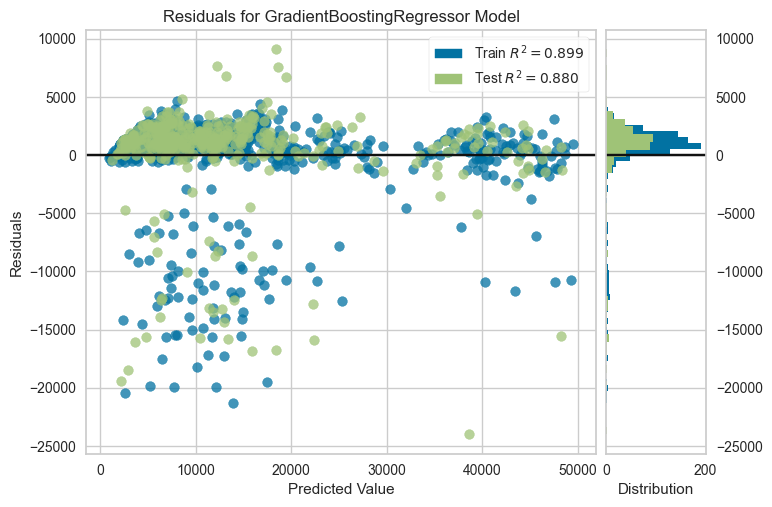

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

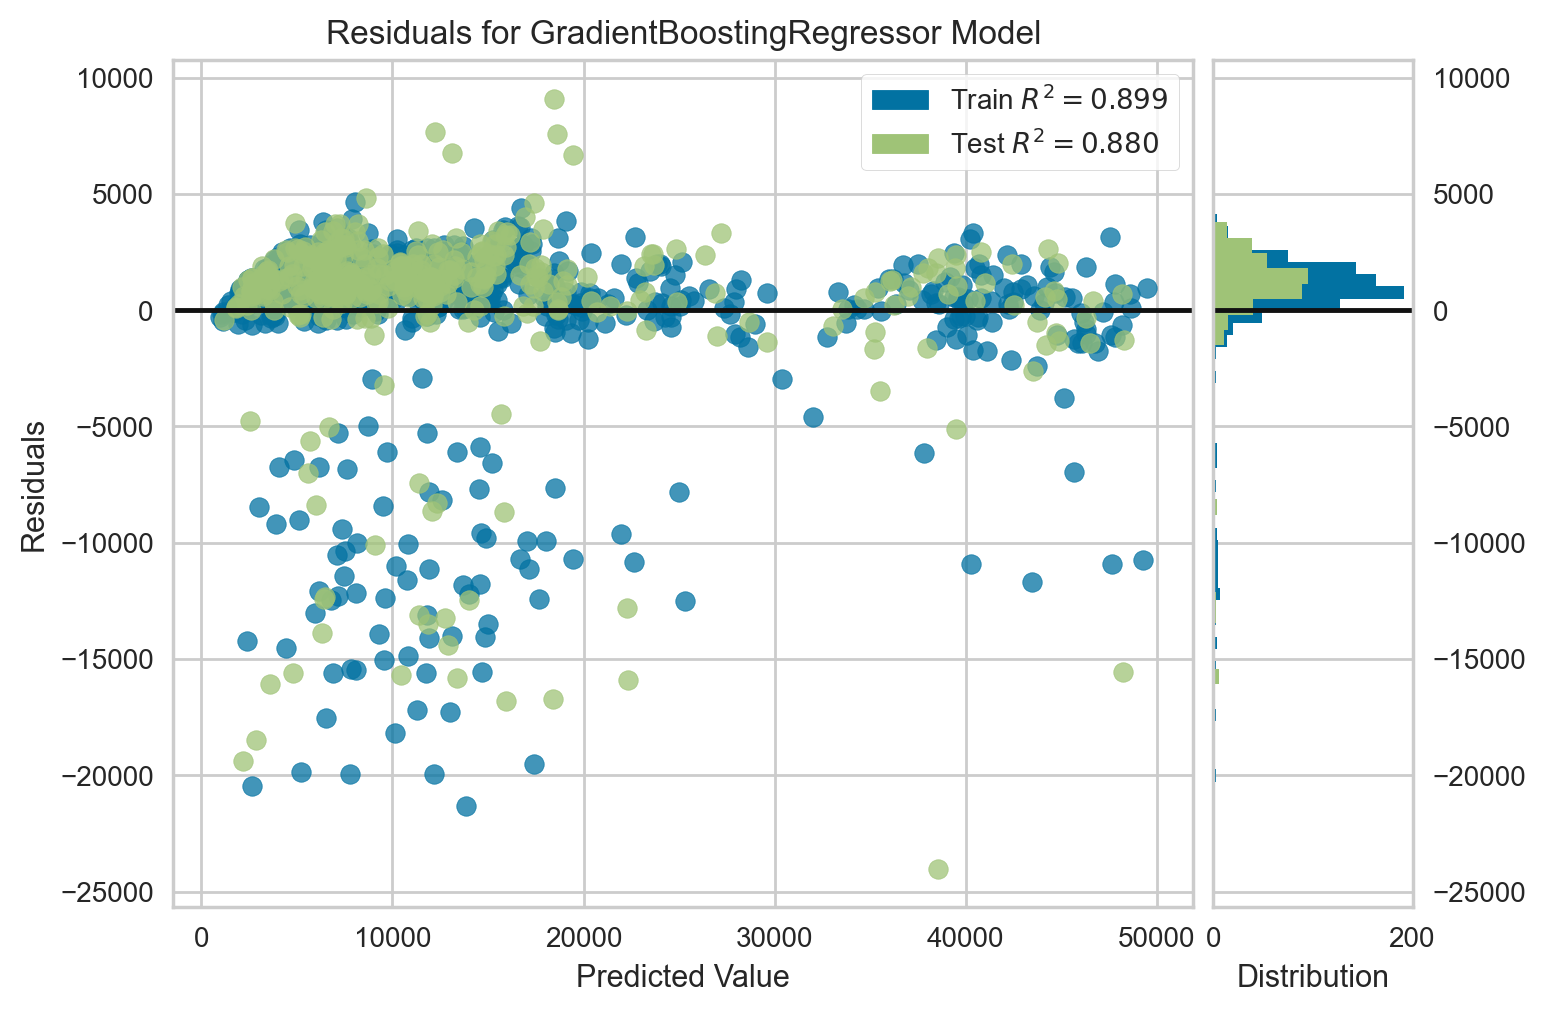

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2896.4964,23611929.4013,4859.2108,0.8590,0.5993,0.3808
1,3075.9419,30047230.7486,5481.5354,0.8253,0.4622,0.3295
2,3096.0185,27757739.1878,5268.5614,0.6486,0.6159,0.4550
3,3347.3144,26993115.8247,5195.4900,0.7746,0.8106,0.5509
4,3263.7660,29391206.7843,5421.3658,0.7814,0.5628,0.3846
5,2922.5372,21672554.7596,4655.3791,0.8606,0.4170,0.2881
6,2733.8071,21012815.3865,4583.9738,0.8570,0.3991,0.3139
7,2865.5796,25843408.7132,5083.6413,0.8579,0.5027,0.2995
8,2715.5680,21671018.5929,4655.2141,0.8600,0.5233,0.4192


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

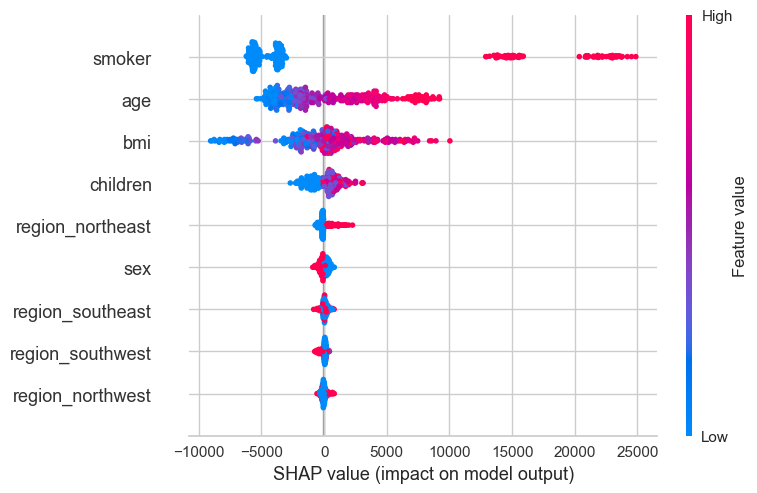

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/67 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4312.6186,3.845275e+07,6182.4796,0.7298,0.6285,0.4460
1,Lasso Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4302.2469,3.838653e+07,6176.4463,0.7306,0.5913,0.4430
2,Ridge Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4296.0642,3.839300e+07,6176.6160,0.7308,0.5710,0.4397
3,Elastic Net,"(TransformerWrapper(include=['age', 'bmi', 'ch...",7571.4598,1.047380e+08,10182.3291,0.2846,0.8954,1.2888
4,Least Angle Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4303.5559,3.838806e+07,6176.5920,0.7306,0.5949,0.4433
...,...,...,...,...,...,...,...,...
61,Decision Tree Regressor,"(TransformerWrapper(include=['age', 'bmi', 'ch...",2343.1447,2.955617e+07,5420.4532,0.7838,0.4525,0.2311
62,Voting Regressor,"(TransformerWrapper(include=['age', 'bmi', 'ch...",2715.9420,2.399157e+07,4879.8346,0.8289,0.4545,0.3218
63,Stacking Regressor,"(TransformerWrapper(include=['age', 'bmi', 'ch...",2687.6885,2.329403e+07,4807.7016,0.8336,0.4460,0.3007


In [ ]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                                                                         'mapping': {nan: -1,
                                                                                     'female': 0,
                                                                                     'male': 1}},
                                                                        {'col': 'smoker',
                                                                         'mapping': {nan: -1,
                                                                                     'no': 0,
                                                                                     'yes': 1}}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ['trained_model', LinearRegression(n_jobs=-1)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
# find best model based on CV metrics
automl()

DecisionTreeRegressor(max_depth=4, random_state=123)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [ ]:
# dashboard function
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


## ✅Create App
This function creates a basic gradio app for inference.

In [ ]:
# create gradio app
create_app(best)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [ ]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                                                                                     'female': 0,
                                                                                     'male': 1}},
                                                                        {'col': 'smoker',
                                                                         'mapping': {nan: -1,
                                                                                     'no': 0,
                                                                                     'yes': 1}}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[4] <= 0.5) {
            if (input[0] <= 0.554347813129425) {
                if (input[3] <= 0.10000000149011612) {
                    if (input[0] <= 0.31521739065647125) {
                        if (input[0] <= 0.09782608598470688) {
                            if (input[2] <= 0.39116452634334564) {
                                if (input[0] <= 0.0326086962595582) {
                                    if (input[1] <= 0.5) {
                                        if (input[5] <= 0.5) {
                                            if (input[8] <= 0.5) {
                                                if (input[0] <= 0.010869565419852734) {
                                                    if (input[2] <= 0.19418424367904663) {
                                                        var0 = 1607.5101318359375;
                                                    } else {
   

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerW...
                                                                                      'female': 0,
                                                                                      'male': 1}},
                                                                         {'col': 'smoker',
                                                                          'mapping': {nan: -1,
                                                                             

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                                                                                     'female': 0,
                                                                                     'male': 1}},
                                                                        {'col': 'smoker',
                                                                         'mapping': {nan: -1,
                                                                                     'no': 0,
                                                                                     'yes': 1}}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3
